In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()       #upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"praneeshsharma","key":"cb84c8a3a7e7de6dd2466b230eaf5571"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cdawn1/messy-vs-clean-room

messy-vs-clean-room.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip messy-vs-clean-room.zip

Archive:  messy-vs-clean-room.zip
  inflating: images/images/test/0.png  
  inflating: images/images/test/1.png  
  inflating: images/images/test/2.png  
  inflating: images/images/test/3.png  
  inflating: images/images/test/4.png  
  inflating: images/images/test/5.png  
  inflating: images/images/test/6.png  
  inflating: images/images/test/7.png  
  inflating: images/images/test/8.png  
  inflating: images/images/test/9.png  
  inflating: images/images/train/clean/0.png  
  inflating: images/images/train/clean/1.png  
  inflating: images/images/train/clean/10.png  
  inflating: images/images/train/clean/11.png  
  inflating: images/images/train/clean/12.png  
  inflating: images/images/train/clean/13.png  
  inflating: images/images/train/clean/14.png  
  inflating: images/images/train/clean/15.png  
  inflating: images/images/train/clean/16.png  
  inflating: images/images/train/clean/17.png  
  inflating: images/images/train/clean/18.png  
  inflating: images/images/train/clean/1

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image

In [44]:
train_messy = "images/train/messy"
train_clean= "images/train/clean"
test_messy= "images/val/messy"
test_clean= "images/val/clean"
image_size = 128

In [47]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [48]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [49]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 10/10 [00:00<00:00, 289.75it/s]


In [50]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [51]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [52]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [53]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [55]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)


In [56]:
y_train = y_train.reshape(number_of_train,)
y_test = y_test.reshape(number_of_test)

In [57]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 180)
x test:  (16384, 32)
y train:  (180,)
y test:  (32,)


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((180, 16384), (180,), (32, 16384), (32,))

In [61]:
model.fit(x_train, y_train)

LogisticRegression()

In [62]:
model.score(x_test, y_test)

0.9375

In [63]:
ans = model.predict(x_test[:30])

In [64]:
ans = list(map(lambda x: "Messy" if x else "Clean", ans))

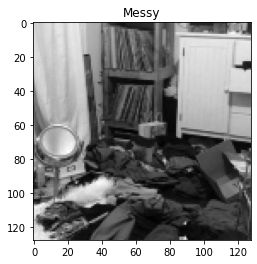

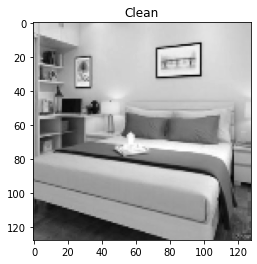

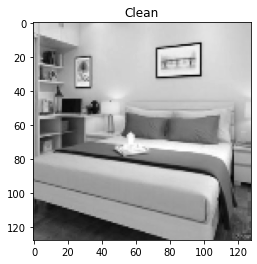

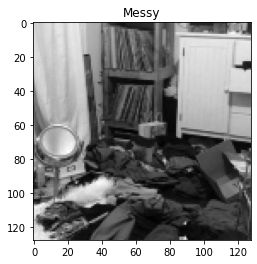

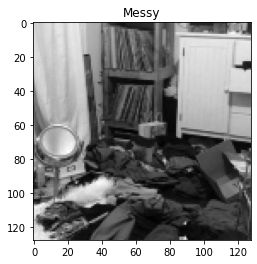

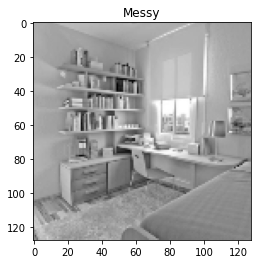

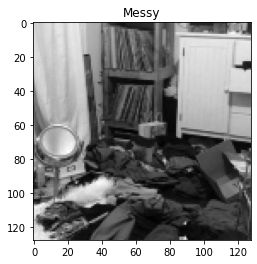

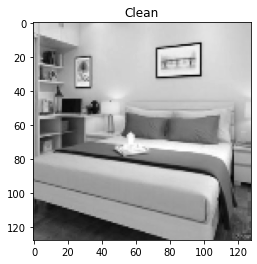

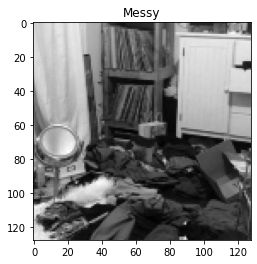

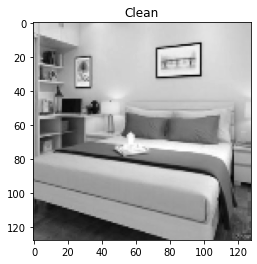

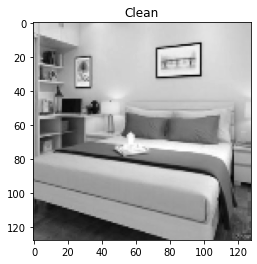

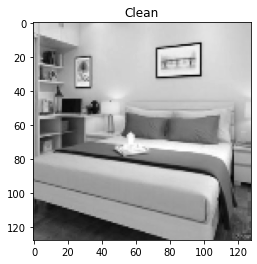

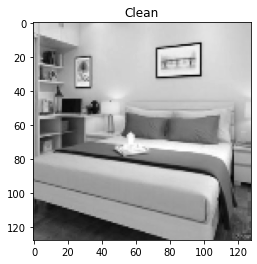

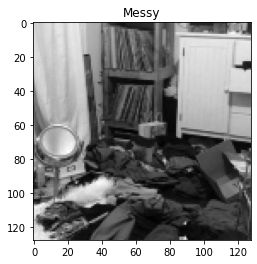

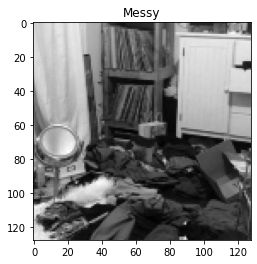

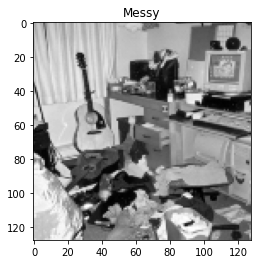

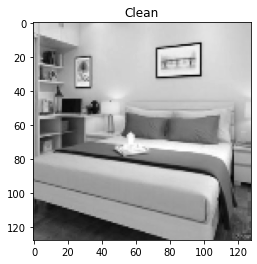

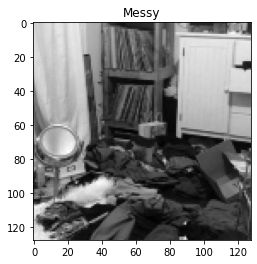

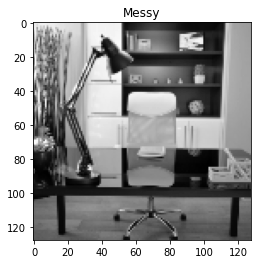

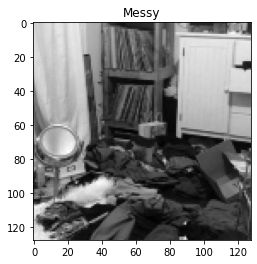

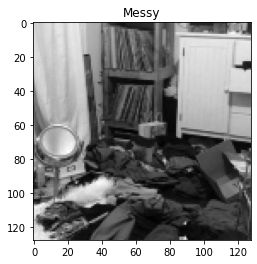

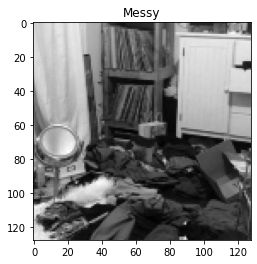

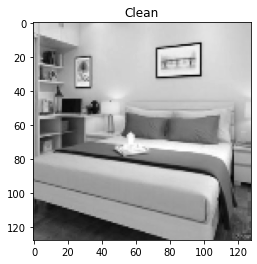

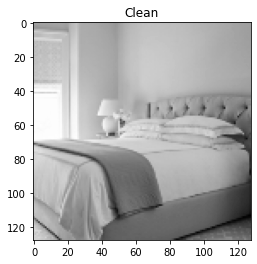

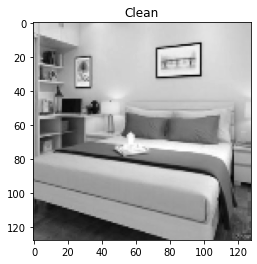

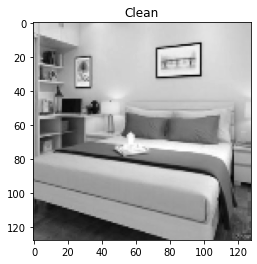

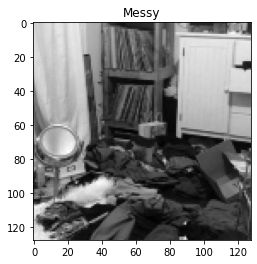

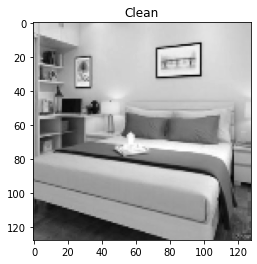

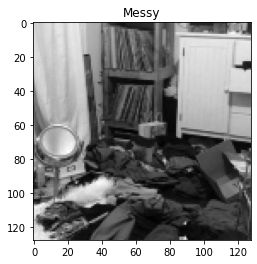

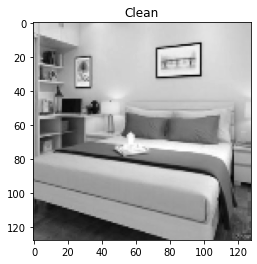

In [65]:
for i in range(len(ans)):
  plt.imshow(x_test[i].reshape(128,128), cmap='gray')
  plt.title(ans[i])
  plt.show()